In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Importing the dataset
df = pd.read_excel('HR.xlsx', index_col=0)

df.head()

# Preprocessing the dataset

# Splitting the dataset into X and y
X = df.drop(['salary'],axis=1)
y = df['salary']

# Replace high medium low in salary with numbers
y = y.replace(['high','medium','low'],[3,2,1])          # EMTREMELY IMPORTANT caused a lot of issues when left as strings

# Converting the categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Logistic Regression from Scratch

In [77]:
# Making Logistic Regression Model from Scratch

class LogisticRegression:
    
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr # learning rate
        self.n_iters = n_iters # number of iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Gradient 
            dw = np.multiply((1 / n_samples), np.dot(X.T, (y_predicted - y)))  
            db = np.multiply((1 / n_samples), np.sum(y_predicted - y))
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [78]:
# Take the dataset and remove all the rows with salary = medium
# This is to make it a binary classification problem

df1 = df[df['salary'] != 'medium']

X1 = df1.drop(['salary'],axis=1)
y1 = df1['salary']

y1 = y1.replace(['high','low'],[0,1])

X1 = pd.get_dummies(X1, drop_first=True)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [79]:
# Training the model
model = LogisticRegression(lr=0.01, n_iters=2000)
model.fit(X_train1, y_train1)

# Predicting the test set results
y_pred1 = model.predict(X_test1)


Accuracy:  86.74980514419329 %


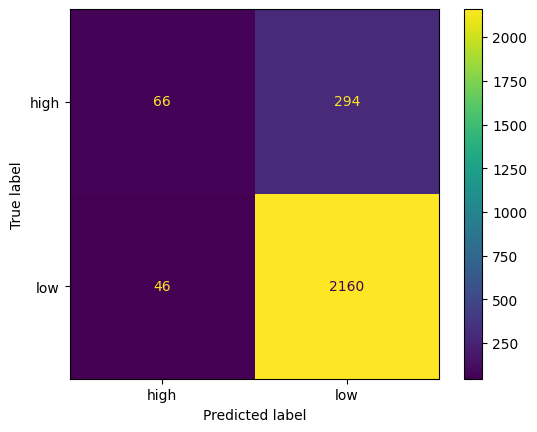

In [81]:
# Making the confusion matrix
cm = confusion_matrix(y_test1, y_pred1)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['high','low']).plot()

# Calculating the accuracy
score = accuracy_score(y_test1, y_pred1)
print("Accuracy: ",score*100,'%')

---

## KNN from Scratch

In [6]:
'''# Making KNN Model from Scratch

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
       # self.X_train = X
       # self.y_train = y
        self.X_train=np.array(X)
        self.y_train=np.array(y).reshape(-1)

    def predict(self, X):
        X=np.array(X)
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]'''

In [82]:
'''# Training the model
model2 = KNN(k=3)
model2.fit(X_train, y_train)

# Predicting the test set results
y_pred = model2.predict(X_test)
# print unique values in y_pred
print(np.unique(y_pred))

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)'''


[1 2 3]
[[1307  795   96]
 [ 832  975  117]
 [ 145  149   84]]


0.5257777777777778

---

## SVM from Scratch

In [84]:
# Making SVM Model from Scratch

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [85]:
# Training the model
classifier = SVM()
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)
# print unique values in y_pred
print(np.unique(y_pred))

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[1.]
[[2198    0    0]
 [1924    0    0]
 [ 378    0    0]]


0.48844444444444446